In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

import prepare



In [2]:
df1 = pd.read_csv('loan.csv')

In [3]:
df2 = pd.read_csv('loan2.csv')

In [4]:
df =pd.concat([df1,df2])

In [5]:
def prep_function(df):
    # set loan id as index
    df = df.set_index('Loan_ID')
    # rename column
    df = df.rename(columns={'ApplicantIncome': "Applicant_Income",'CoapplicantIncome': "Coapplicant_Income", 'LoanAmount':"Loan_Amount"})
    # drop nulls in all but loan status
    df = df.dropna()
    return df

In [6]:
df = prep_function(df)

In [7]:
#split
train, validate, test = prepare.train_validate_test_split(df, 'Loan_Status')

In [8]:
def encode(train, validate, test):
    # Encoding categorical data
    # Encoding the Independent Variable
    from sklearn.preprocessing import LabelEncoder
    labelencoder_X = LabelEncoder()
    # I am going to loop through each col of the type object and encode
    for col in train.select_dtypes(include = 'object'):
        train[col]=labelencoder_X.fit_transform(train[col]) 
        validate[col]=labelencoder_X.fit_transform(validate[col]) 
        test[col]=labelencoder_X.fit_transform(test[col]) 
    return train, validate, test
    

In [9]:
train, validate, test = encode(train, validate, test)

In [10]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
LP001836,0,0,2,0,0,3427,0.0,138.0,360.0,1.0,2,0
LP002606,0,0,0,0,0,3159,0.0,100.0,360.0,1.0,1,1
LP002684,0,0,0,1,0,3400,0.0,95.0,360.0,1.0,0,0
LP002308,1,1,0,1,0,2167,2400.0,115.0,360.0,1.0,2,1


<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

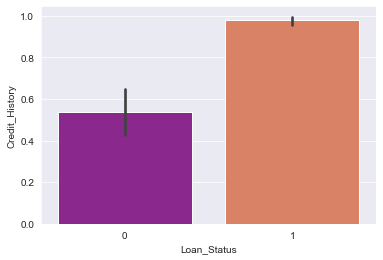

In [13]:
# set the background style of the plot
sns.set_style('darkgrid')
 
# plot the graph using the default estimator mean
sns.barplot(x ='Loan_Status', y ='Credit_History', data = train, palette ='plasma')
 

In [11]:
def split_2(train, validate, test): 
    # here I split into my features and target
    y_train = train[['Loan_Status']]
    X_train = train.drop(columns= 'Loan_Status')
    y_validate = validate[['Loan_Status']]
    X_validate = validate.drop(columns= 'Loan_Status')
    y_test = test[['Loan_Status']]
    X_test = test.drop(columns= 'Loan_Status')
    return train, validate, test, y_train, X_train, y_validate, X_validate, y_test, X_test
    

In [12]:
train, validate, test, y_train, X_train, y_validate, X_validate, y_test, X_test =split_2(train, validate, test)

In [13]:
def scaling(X_train, X_validate, X_test): 
    # time to scale features
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_validate = sc.transform(X_validate)
    X_test = sc.transform(X_test)
    return X_train, X_validate, X_test

In [14]:
scaling(X_train, X_validate, X_test)

(array([[ 0.47891314,  0.77768272,  0.28334549, ...,  0.31066   ,
          0.43109246, -1.35752105],
        [-2.0880613 , -1.28587143,  1.28251116, ...,  0.31066   ,
          0.43109246,  1.21361422],
        [-2.0880613 , -1.28587143, -0.71582018, ...,  0.31066   ,
          0.43109246, -0.07195341],
        ...,
        [ 0.47891314,  0.77768272,  1.28251116, ...,  0.31066   ,
          0.43109246, -1.35752105],
        [ 0.47891314, -1.28587143, -0.71582018, ...,  0.31066   ,
         -2.31968799, -1.35752105],
        [ 0.47891314,  0.77768272, -0.71582018, ...,  0.31066   ,
          0.43109246, -1.35752105]]),
 array([[-2.0880613 ,  0.77768272,  0.28334549, ...,  0.31066   ,
          0.43109246, -0.07195341],
        [-2.0880613 , -1.28587143, -0.71582018, ...,  0.31066   ,
         -2.31968799,  1.21361422],
        [ 0.47891314,  0.77768272,  0.28334549, ...,  0.31066   ,
          0.43109246, -0.07195341],
        ...,
        [ 0.47891314,  0.77768272, -0.71582018, ...,  

In [ ]:
# examle of how to make a df
comparison_df = pd.DataFrame({}

# Making predictions
yhat_df = pd.DataFrame({target_var: [last_ov]}, index = validate.index)
yhat_df.head(3)

In [ ]:
# Adding RMSE of baseline Model to my eval datafram
eval_df = append_eval_df(model_type = 'Last Observed Value', target_var = target_var)
eval_df

In [ ]:
# set the background style of the plot
sns.set_style('darkgrid')
 
# plot the graph using the default estimator mean
sns.barplot(x ='sex', y ='total_bill', data = df, palette ='plasma')
 